In [1]:
# 지도 학습: 분류(예측값이 이산형), 회귀(예측값이 연속형)
# 회귀 분석: 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
#           여러 개의 독립변수(피처)와 한 개의 종속변수(결정 값) 간의 상관관계를 모델링 -> 최적의 회귀 걔수를 찾아냄
# 회귀 계수: 독립 변수의 값에 영향을 미치는 것, 중심 변수임을 인지하자!!!!!! 
# 독립 변수 개수 (1개: 단일회귀, 여러 개: 다중 회귀) / 회귀 계수의 결합 (선형: 선형 회귀, 비선형: 비선형 회귀)

# 선형 회귀: 실제 값과 예측 값의 차이(오차의 제곱합)를 최소화하는 직선형 회귀선을 최적화하는 
# 규제: 일반적인 선형회귀의 과적합을 해결하기 위해서 회귀 계수에 패널티 값을 적용하는 것
## 릿지: L2 규제 (상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델)
## 라쏘: L1 규제 (예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것)
## 엘라스틱넷: L2, L1규제를 함께 결합한 모델

# 단순 선형 회귀: 독립변수 1개, 종속변수 1개
# RSS: 오류의 제곱 합 -> 비용 / w변수로 구성된 RSS를 비용(손실) 함수

# 경사 하강법: 점진적으로 반복적인 계산을 통해 W 파라미터의 값을 업데이트하면서 오류 값이 최소가 되는 W파라미터를 구하는 방식

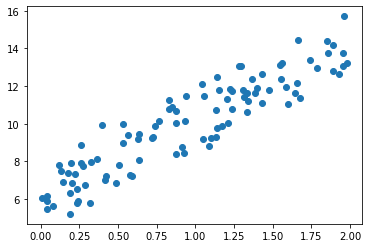

In [16]:
######################경사 하강법
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

X=2*np.random.rand(100, 1) # np.random.rand(m, n): 0~1 균일 분포에서 matrix(m, n) 생성
y=6 + 4*X + np.random.randn(100, 1) # np.random.randn(m, n): 가우시안 표준 정규 분포에서 matrix(m, n) 생성
plt.scatter(X, y)

In [8]:
# 비용 함수 정의
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [9]:
# w1 과 w0 를 업데이트하는 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)# np.zeros_like : 어떤 변수만큼의 사이즈인 0 으로 가득 찬 Array를 배출
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    

    return w1_update, w0_update

In [15]:
# w1과 w0를 업데이트하는 함수 gradient_descent_steps()
def gradient_descent_steps(X, y, iters=10000): 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [19]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


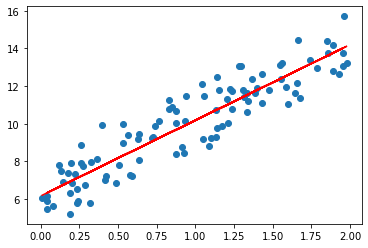

In [13]:
plt.scatter(X, y)
plt.plot(X,y_pred,'r')

In [20]:
###############확률적 경사 하강법: 일부 데이터만 이용해 w가 업데이트되는 값을 계산
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0

    for ind in range(iters):
        np.random.seed(ind)
        
        stochastic_random_index = np.random.permutation(X.shape[0]) # permutation은 array를 복사해서 셔플을 한다
        sample_X = X[stochastic_random_index[0:batch_size]] # batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        sample_y = y[stochastic_random_index[0:batch_size]]
    
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01) 
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [22]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


In [24]:
###################### 주택 가격 예측
# LinearRegression 클래스 : RSS를 최소화해 Ordinary Least Squares 추정 방식으로 구현한 클래스
# class sklearn.linear_model_LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
# fit_intercept: 절편 값을 계산할지 말지

# 다중 공선성: 피처 간의 상관관계가 높을 때 (OLS 기반은 입력 피처의 독립성에 많은 영향)

# 회귀 평가지표: MAE, MSE, RMSE, R^2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline


boston = load_boston()
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


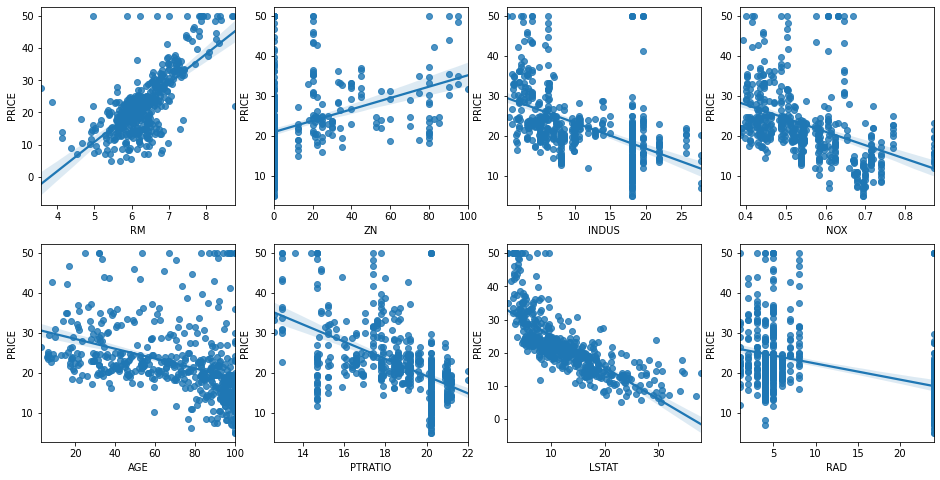

In [25]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # regplot: 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])
    # RM과 LSTAT가 가격의 영향도 뚜렷하게 나타남

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE',axis=1,inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target,test_size = 0.3, random_state =156)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print(mse, rmse)
print(r2_score(y_test, y_preds))

17.29691590790215 4.158956107955715
0.7572263323138921


In [28]:
print(lr.intercept_)
print(np.round(lr.coef_,1))

40.995595172164336
[ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [29]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [30]:
# cross_val_score 통해 MSE, RMSE 측정해보기
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(np.round(neg_mse_scores, 2))
print(np.round(rmse_scores, 2))
print(avg_rmse)

[-12.46 -26.05 -33.07 -80.76 -33.31]
[3.53 5.1  5.75 8.99 5.77]
5.828658946215808


In [31]:
# 다항 회귀: 독립변수가 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것
# 다항 회귀는 선형 회귀
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
print(X)

poly = PolynomialFeatures(degree= 2) # degree = n, n차 다항식으로 변환
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature : \n', poly_ftr)

[[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [32]:
def polynomial_func(X):
    y = 1+ 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(0,4).reshape(2,2)
print(X)
y = polynomial_func(X)
print( y)

[[0 1]
 [2 3]]
[  5 125]


In [33]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree =3).fit_transform(X)
print(poly_ftr)

model = LinearRegression()
model.fit(poly_ftr,y)
print(np.round(model.coef_,2))
print(model.coef_.shape)

[[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
[0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
(10,)


In [34]:
# 사이킷런 파이프라인 객체
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print( np.round(model.named_steps['linear'].coef_, 2))

[0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]



Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87417100e+06  2.03717220e+07
 -1.44873987e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE 는 182815433.48 입니다.


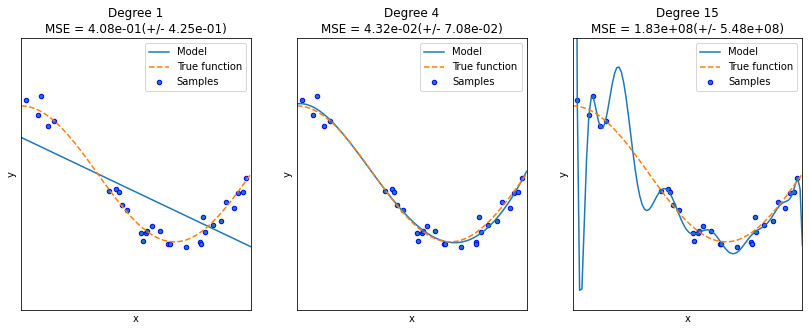

In [35]:
# 다항 회귀 과소적합/ 과적합 , 차수가 높아질수록 과적합의 문제가 크게 발생
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

In [ ]:
# 편향/ 분산 트레이드오프 : 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향
# 분산이 낮으면 과소적합, 분산이 커지면 과대적합